In [1]:
# 步骤
# 1、图片数据预处理
# 2、加载模型
# 3、训练模型
# 4、预测图片
# 5、评估测试数据集
# 6、保存模型
# 7、调用加载模型

In [2]:
# 导入包
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
%matplotlib inline

In [3]:
# 随机选一张图片
img_path = './yalefaces/train/subject01.glasses.gif'

In [4]:
# 读取GIF格式图片
cap = cv2.VideoCapture(img_path)
ret,img = cap.read()

In [5]:
img.shape

(243, 320, 3)

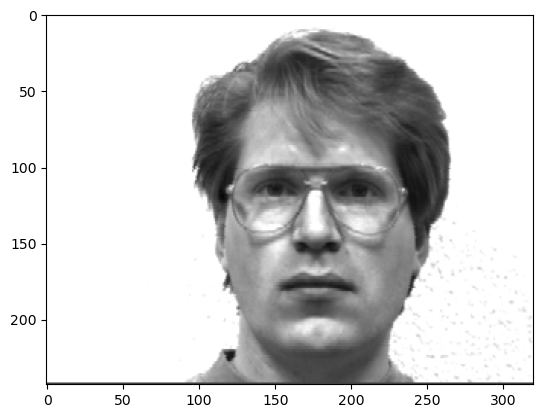

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
# 图片预处理
# img_list:numpy格式图片
# label_list：numpy格式的label
# cls.train(img_list,np.array(label_list)) 

In [8]:
# 为了减少运算，提高速度，将人脸区域用人脸检测器提取出来
# 构造hog人脸检测器
hog_face_detector = dlib.get_frontal_face_detector()

In [5]:
def getFaceImgLabel(fileName):
    # 读取图片
    cap = cv2.VideoCapture(fileName)
    ret,img = cap.read()
    
    # 转为灰度图
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # 检测人脸
    detections = hog_face_detector(img,1)
    
    # 判断是否有人脸
    if len(detections) > 0:
        # 获取人脸区域坐标
        x = detections[0].left()
        y = detections[0].top()
        r = detections[0].right()
        b = detections[0].bottom()
        # 截取人脸
        img_crop = img[y:b,x:r]
        # 缩放解决冲突
        img_crop = cv2.resize(img_crop,(120,120))
        # 获取人脸labelid
        label_id = int(fileName.split('/')[-1].split('.')[0].split('subject')[-1])
        # 返回值
        return img_crop,label_id
    else:
        return None,-1
        
            

In [6]:
img_path = './yalefaces/train/subject01.glasses.gif'

In [7]:
# 测试一张图片
img,label = getFaceImgLabel(img_path)

NameError: name 'cv2' is not defined

In [ ]:
label

In [ ]:
img.shape

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))

In [ ]:
# 遍历train文件夹，对所有图片同样处理
# 拼接成大的list

import glob


In [ ]:
file_list =glob.glob('./yalefaces/train/*')
# 构造两个空列表
img_list = []
label_list = []

for train_file in file_list:
    # 获取每一张图片的对应信息
    img,label = getFaceImgLabel(train_file)
    
    #过滤数据
    if label != -1:
        img_list.append(img)
        label_list.append(label)
    

In [ ]:
# 查看label_list大小
len(label_list)

In [ ]:
# 查看img_list大小
len(img_list)

In [4]:
# 构造分类器
face_cls = cv2.face.LBPHFaceRecognizer_create()
# cv2.face.EigenFaceRecognizer_create()
# cv2.face.FisherFaceRecognizer_create()

NameError: name 'cv2' is not defined

In [20]:
# 训练
face_cls.train(img_list,np.array(label_list))

In [21]:
# 预测一张图片
test_file = './yalefaces/test/subject03.glasses.gif'

img,label = getFaceImgLabel(test_file)
#过滤数据
if label != -1:
    predict_id,distance = face_cls.predict(img)
    print(predict_id)

3


In [22]:
# 评估模型
file_list =glob.glob('./yalefaces/test/*')

true_list = []
predict_list = []

for test_file in file_list:
    # 获取每一张图片的对应信息
    img,label = getFaceImgLabel(test_file)
    #过滤数据
    if label != -1:
        predict_id,distance = face_cls.predict(img)
        predict_list.append(predict_id)
        true_list.append(label)
    

In [23]:
# 查看准确率
from sklearn.metrics import accuracy_score
accuracy_score(true_list,predict_list)

0.7241379310344828

In [24]:
# 获取融合矩阵
from sklearn.metrics import confusion_matrix


In [25]:
cm = confusion_matrix(true_list,predict_list)

In [26]:
cm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [27]:
# 可视化
import seaborn

<AxesSubplot:>

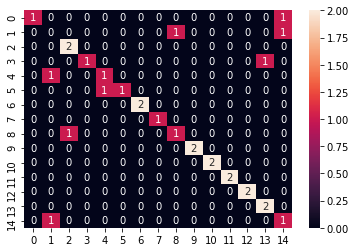

In [28]:
seaborn.heatmap(cm,annot=True)

In [30]:
# 保存模型
face_cls.save('./weights/LBPH.yml')

In [31]:
# 调用模型
new_cls = cv2.face.LBPHFaceRecognizer_create()

In [32]:
new_cls.read('./weights/LBPH.yml')

In [33]:
# 预测一张图片
test_file = './yalefaces/test/subject03.glasses.gif'

img,label = getFaceImgLabel(test_file)
#过滤数据
if label != -1:
    predict_id,distance = new_cls.predict(img)
    print(predict_id)

3
